In [1]:
import sys
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

sys.path.insert(0, '../')
from few.trajectory.flux import RunSchwarzEccFluxInspiral
from few.amplitude.romannet import ROMANAmplitude

## Trajectory Module

In [2]:
traj = RunSchwarzEccFluxInspiral()

In [3]:
M = 1e5
mu = 1e1
p0 = 10.0
e0 = 0.7

for i in range(20):
    t, p, e, Phi_phi, Phi_r, flux = traj(M, mu, p0, e0)

Text(0, 0.5, 'e')

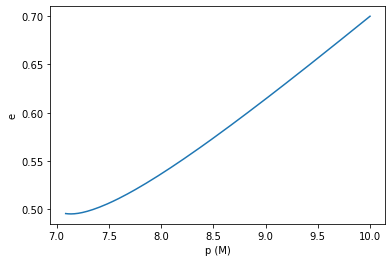

In [4]:
plt.plot(p, e)
plt.xlabel('p (M)')
plt.ylabel('e')

### Defining a new t vector

/Users/michaelkatz/anaconda3/envs/few_env/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


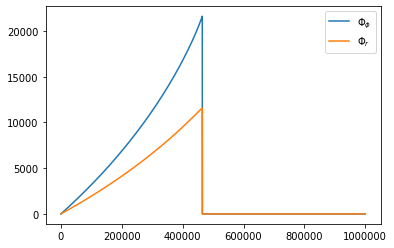

In [5]:
new_t = np.arange(0, 1e6, 1.0) 
t, p, e, Phi_phi, Phi_r, flux = traj(M, mu, p0, e0, new_t=new_t, upsample=True)

plt.plot(t, Phi_phi, label=r'$\Phi_\phi$')
plt.plot(t, Phi_r, label=r'$\Phi_r$')
plt.legend()

### Defining dt and T

/Users/michaelkatz/anaconda3/envs/few_env/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


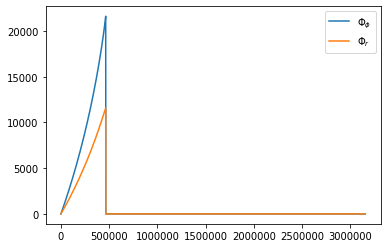

In [8]:
dt = 15.0
T = 0.1 # years
t, p, e, Phi_phi, Phi_r, flux = traj(M, mu, p0, e0, dt=dt, T=T, upsample=True)

plt.plot(t, Phi_phi, label=r'$\Phi_\phi$')
plt.plot(t, Phi_r, label=r'$\Phi_r$')
plt.legend()

## Amplitude Module

In [7]:
amp = ROMANAmplitude()

(2500,)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


/Users/michaelkatz/anaconda3/envs/few_env/lib/python3.7/site-packages/numpy/ma/core.py:2795: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


Text(0, 0.5, 'e')

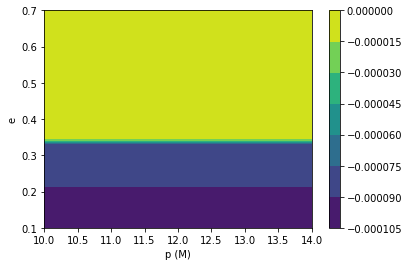

In [8]:
p = np.linspace(10.0, 14.0)
e = np.linspace(0.1, 0.7)

p_all, e_all = np.asarray([temp.ravel() for temp in np.meshgrid(p, e)])
print(p_all.shape)
for i in range(20):
    teuk_modes = amp(p_all, e_all)
    print(i)
cb = plt.contourf(p, e, teuk_modes[:, 0].reshape(len(p), len(e)))
plt.colorbar(cb)
plt.xlabel('p (M)')
plt.ylabel('e')